# Practice
Failure to see a doctor is a serious public health problem. Missed appointments cost the US healthcare system nearly [$ 200 each](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4714455/). Therefore, it should come as no surprise that reducing absenteeism has become a priority in the United States and around the world. [Numerous studies](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3962267/) have been conducted to identify the most effective means of reducing absenteeism. The first step to solving the problem is to understand why the patient is missing a scheduled appointment.

[Data](https://drive.google.com/open?id=1bvlBkt0AYFw6ZLSjB41xHLnCLkweXxXE),

A description of the data can be found at [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments)

We want to answer essentially two questions:


1. What is the profile of a person who misses scheduled visits to the doctor?
2. What factors influence a no show?

Keep this in mind. Accompany your answers with charts, do not forget to label the axes and titles, and also choose not the type of visualization that you understand how it works, but the one that is right for the task.

In [1]:
import pandas as pd
import numpy as np

# we will display plots directly in jupyter
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# plots in svg look clearer
%config InlineBackend.figure_format = 'svg'

# to increase the default plots sizes
from pylab import rcParams

import datetime
import time

In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv')

#### Task 0
Change the no-show column to the show column to remove double negation

to make it more clear, it is proposed to rename this column to "is_absence":

In [3]:
df = df.rename(columns={'No-show': 'is_absence'})

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,is_absence
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Task 1
Check data for gaps and outliers

##### gaps:

In [5]:
print('Check data for gaps:\n')

print('| column : num_of_gaps |')
for column in df.columns:
    print('| ' + str(column) + ' : ' + str(len(df[df[column].isnull()])) + ' |')

Check data for gaps:

| column : num_of_gaps |
| PatientId : 0 |
| AppointmentID : 0 |
| Gender : 0 |
| ScheduledDay : 0 |
| AppointmentDay : 0 |
| Age : 0 |
| Neighbourhood : 0 |
| Scholarship : 0 |
| Hipertension : 0 |
| Diabetes : 0 |
| Alcoholism : 0 |
| Handcap : 0 |
| SMS_received : 0 |
| is_absence : 0 |


there are no some gaps in the data

###### outliers:

by the description of the columns, something interesting can only show 'Age', as the only quantitative feature

let's take a look at histogram:

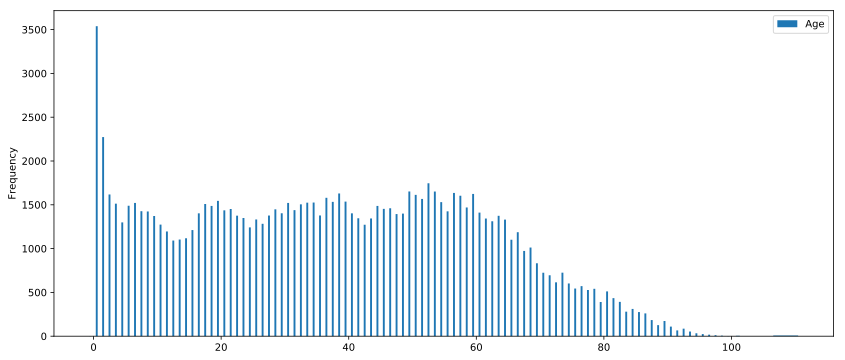

In [6]:
rcParams['figure.figsize'] = 14, 6
df[['Age']].plot(kind='hist',bins=sorted(list(df['Age'].unique())),rwidth=0.3)

nothing super special in terms of outliers

#### Task 2
Cast columns to correct data types (at least temporary)

let's look dataframe info:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
is_absence        110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


for column 'PatientId' the int-type is more relevant:

In [8]:
df['PatientId'] = df.PatientId.astype('int64')

columns 'ScheduledDay' and 'AppointmentDay' convert to datetime-format:

In [9]:
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay)
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay)

#### Task 3
Check age ranges (Age)

Are there any entries that seem suspicious to you?
Should these records be kept or should they be removed? Why do you think so (the description of the data on the kaggle website can help in solving this question)?

by the histogram, there are a lot of values of '0', perhaps newborns are more often shown to the doctor

special attention should be paid to the patient with age '115'

other cases look adequate

the only record with the value '-1' - it is clearly some mistake in the data

the histogram below shows the attended and missed appointments for each age:

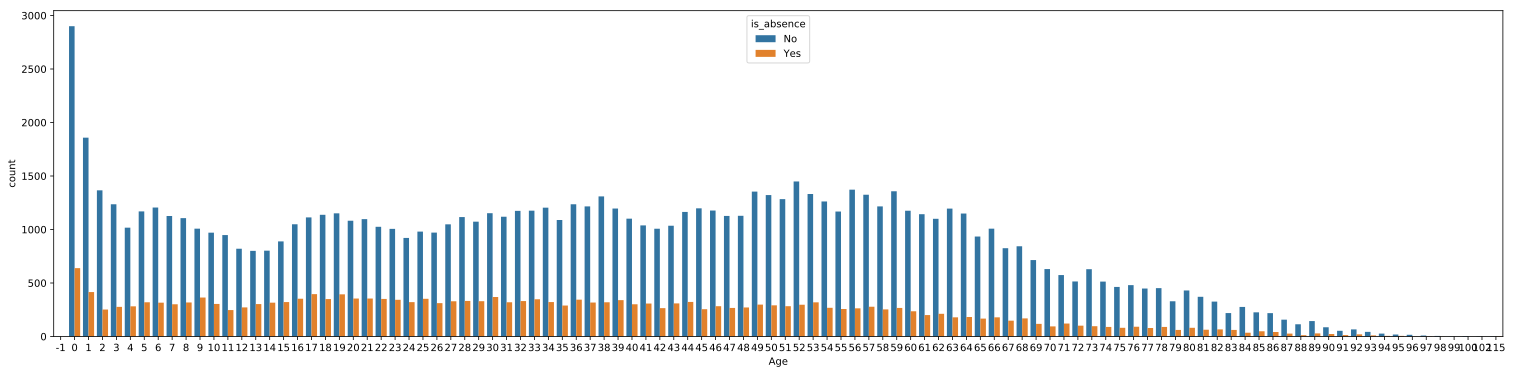

In [10]:
rcParams['figure.figsize'] = 26, 6
sns.countplot(x='Age', hue='is_absence', data=df)

distribution of missed appointments by ages looks rather adequate, so there are no some reasons to change or remove some age data yet

#### Task 4
Are the patients unique in our table? Are we dealing with a list of one-off appointments, or at least some of them are regular?

for each patient let's take a look a count of appointments in this data:

In [11]:
df_app_count = df[['PatientId','AppointmentID']]
df_app_count['app_count'] = df_app_count.groupby('PatientId').AppointmentID.transform(len)
df_app_count = df_app_count[['PatientId','app_count']].drop_duplicates()

C:\Users\ushakov_nv\Programms\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
df_app_count.head()

,PatientId,app_count
0,29872499824296,2
1,558997776694438,2
2,4262962299951,2
3,867951213174,2
4,8841186448183,1


let's look a describe:

In [13]:
df_app_count.describe()

,PatientId,app_count
count,6.229900e+04,62299.000000
mean,1.471711e+14,1.774138
std,2.549091e+14,1.770324
min,3.921700e+04,1.000000
25%,4.176937e+12,1.000000
50%,3.198866e+13,1.000000
75%,9.484809e+13,2.000000
max,9.999816e+14,88.000000


and the histogram:

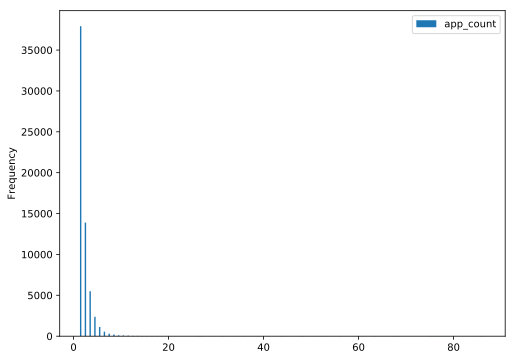

In [14]:
rcParams['figure.figsize'] = 8, 6
df_app_count[['app_count']].plot(kind='hist',bins=sorted(list(df_app_count['app_count'].unique())),rwidth=0.3)

so we can see that for the most of patients it's about 1-2 appointments

#### Task 5
If we have repeated visits, does the number (1st, 2nd, 3rd ...) of the reception somehow affect the turnout? Where absenteeism occurs more often, for regular visits or for one-off?

to realize this point for each group of patients (who have 1,2,3,etc. receptions) we are going to calculate common count of attended and missed appointments:

In [15]:
df_patients_groups = pd.merge(df[['PatientId','is_absence']], df_app_count, how='inner', on='PatientId')
df_patients_groups.head()

,PatientId,is_absence,app_count
0,29872499824296,No,2
1,29872499824296,No,2
2,558997776694438,No,2
3,558997776694438,No,2
4,4262962299951,No,2


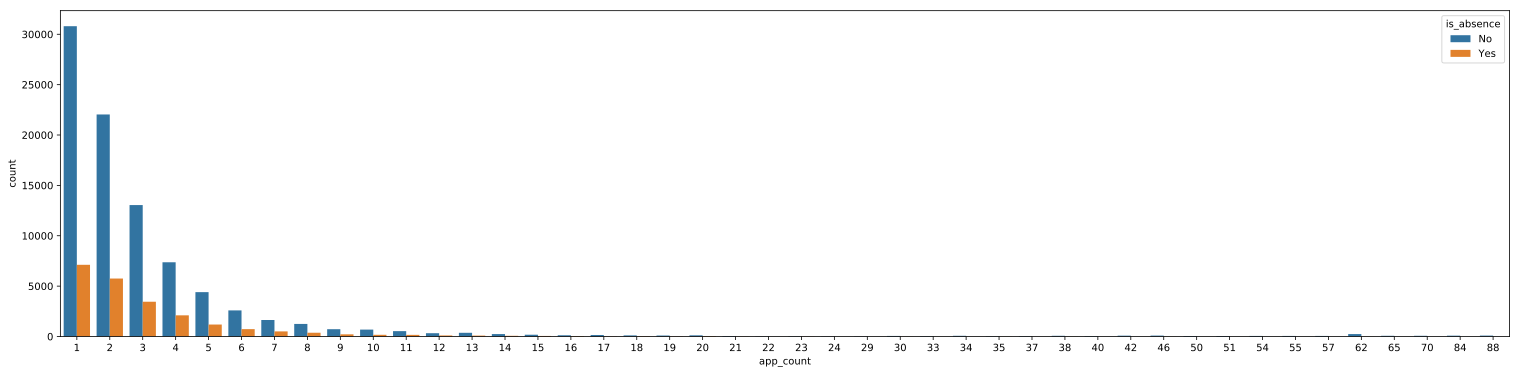

In [16]:
rcParams['figure.figsize'] = 26, 6
sns.countplot(x='app_count', hue='is_absence', data=df_patients_groups)

it seems that the num of missed appointmens correlates with the common num in each group, dut after 10 it becomes difficult to estimate distribution

let's try to look more detailed graphic for groups starting from 11:

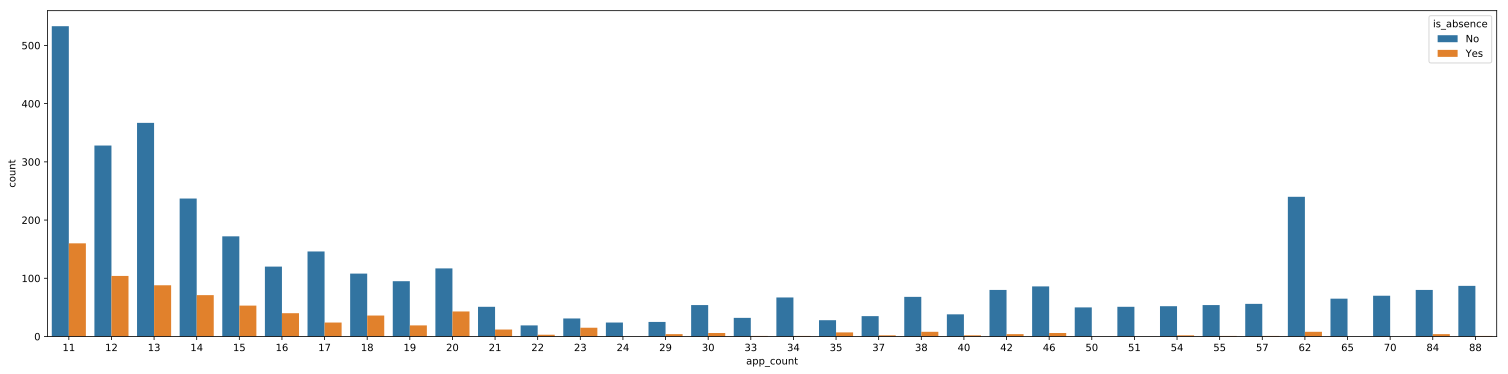

In [17]:
rcParams['figure.figsize'] = 26, 6
sns.countplot(x='app_count', hue='is_absence', data=df_patients_groups[df_patients_groups.app_count > 10])

this one is not so clear!

let's calculate part of missed appointmens from common num for each group:

In [18]:
df_patients_groups['missed_app'] = df_patients_groups[df_patients_groups.is_absence == 'Yes'].groupby('app_count')['PatientId'].transform(len)
df_patients_groups['common_app'] = df_patients_groups.groupby('app_count')['PatientId'].transform(len)
df_patients_groups['part_of_missed_%'] = (df_patients_groups.missed_app / df_patients_groups.common_app) * 100

plot_data_5 = df_patients_groups[df_patients_groups.is_absence == 'Yes'][['app_count','part_of_missed_%']].drop_duplicates()
plot_data_5.head()

,app_count,part_of_missed_%
7,2,20.694494
11,1,18.771097
29,6,21.971067
54,5,21.268990
73,7,23.576097


In [19]:
plot_data_5.describe()

,app_count,part_of_missed_%
count,39.000000,39.000000
mean,26.666667,15.321577
std,21.721119,9.016910
min,1.000000,1.136364
25%,10.500000,5.202703
50%,20.000000,19.047619
75%,37.500000,22.772806
max,88.000000,32.608696


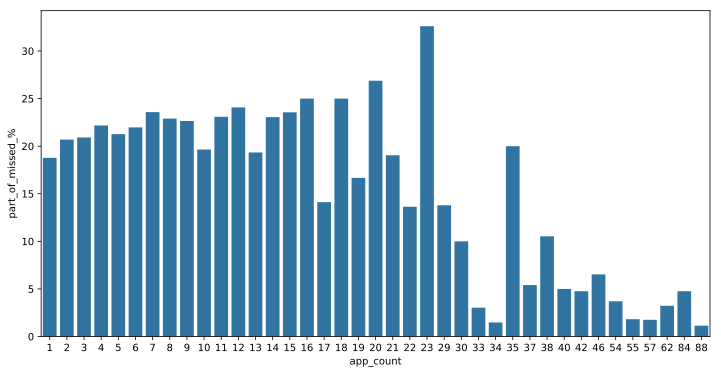

In [20]:
rcParams['figure.figsize'] = 12, 6
sns.barplot(data=plot_data_5, x = 'app_count', y = 'part_of_missed_%', color="tab:blue")

here we can conclude that on average count of missed approximately the same for groups from 1 to 20 and it is 15-20%, for groups 20-35 our indicator behaves extremely unpredictably, and starting with the group 35 the part of missed gradually decrease and the average is 5-7%

in general, we can say that there patients with a large number of appointments have fewer absences

#### Task 6
Explore the effect of age on turnout

in addition to the histogram from the task 3 let's calculate (like previous task) part of missed appointmens from common num for each age:

In [21]:
df_ages_groups = df[['PatientId','Age','is_absence']]
df_ages_groups['missed_app'] = df_ages_groups[df_ages_groups.is_absence == 'Yes'].groupby('Age')['PatientId'].transform(len)
df_ages_groups['common_app'] = df_ages_groups.groupby('Age')['PatientId'].transform(len)
df_ages_groups['part_of_missed_%'] = (df_ages_groups.missed_app / df_ages_groups.common_app) * 100

plot_data_6 = df_ages_groups[df_ages_groups.is_absence == 'Yes'][['Age','part_of_missed_%']].drop_duplicates()
plot_data_6.head()

C:\Users\ushakov_nv\Programms\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ushakov_nv\Programms\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ushakov_nv\Programms\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,Age,part_of_missed_%
6,23,25.426242
7,39,22.135417
11,29,23.521026
17,40,21.469330
20,30,24.260355


In [22]:
plot_data_6.describe()

,Age,part_of_missed_%
count,100.000000,100.000000
mean,49.660000,19.850523
std,29.329621,5.891340
min,0.000000,5.882353
25%,24.750000,16.436356
50%,49.500000,19.237569
75%,74.250000,22.894006
max,115.000000,60.000000


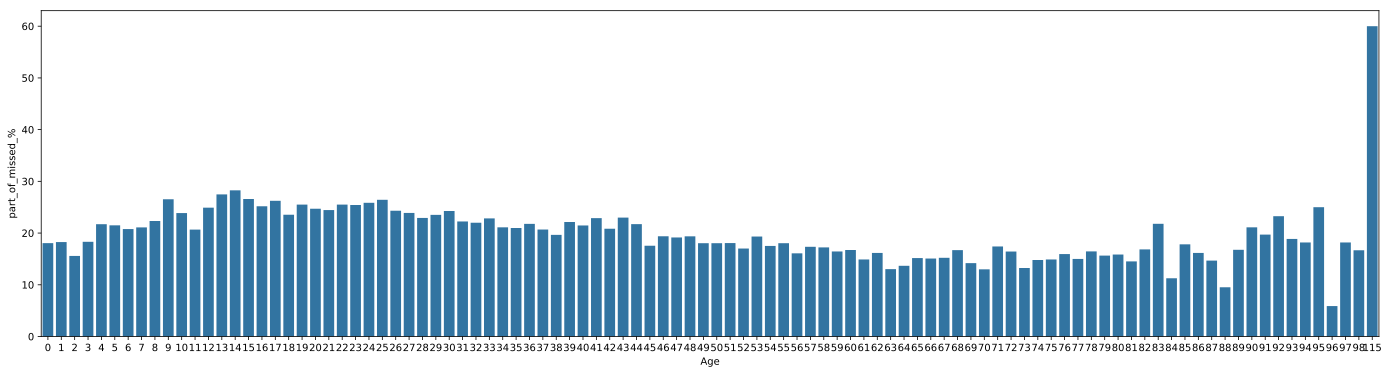

In [23]:
rcParams['figure.figsize'] = 24, 6
sns.barplot(data=plot_data_6, x = 'Age', y = 'part_of_missed_%', color="tab:blue")

age has practically no effect on the num of absences, on average in all age groups part of absence is 20% except for the already mentioned in task 3 115years patient with 60% of missed, but most likely this is the specifics of his unusual age

#### Task 7
For the breakdown by age, add a breakdown by gender. Maybe one gender skips receptions more often than the other? In all age groups, we can confidently compare the chance of missing (in other words, is there a bias in any of the groups towards men or women in the number of appointments)?

in the previous study, we will add a breakdown by gender:

In [24]:
df_ages_gender = df[['PatientId','Age','Gender','is_absence']]
df_ages_gender['missed_app'] = df_ages_gender[df_ages_gender.is_absence == 'Yes'].groupby(['Age','Gender'])['PatientId'].transform(len)
df_ages_gender['common_app'] = df_ages_gender.groupby(['Age','Gender'])['PatientId'].transform(len)
df_ages_gender['part_of_missed_%'] = (df_ages_gender.missed_app / df_ages_gender.common_app) * 100

plot_data_7 = df_ages_gender[df_ages_gender.is_absence == 'Yes'][['Age','Gender','part_of_missed_%']].drop_duplicates()
plot_data_7.head()

C:\Users\ushakov_nv\Programms\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ushakov_nv\Programms\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ushakov_nv\Programms\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,Age,Gender,part_of_missed_%
6,23,F,25.955734
7,39,F,21.978022
11,29,M,21.003135
17,40,F,22.535211
20,30,F,25.000000


firstly, let's look at the gender ratio among patients of each age:

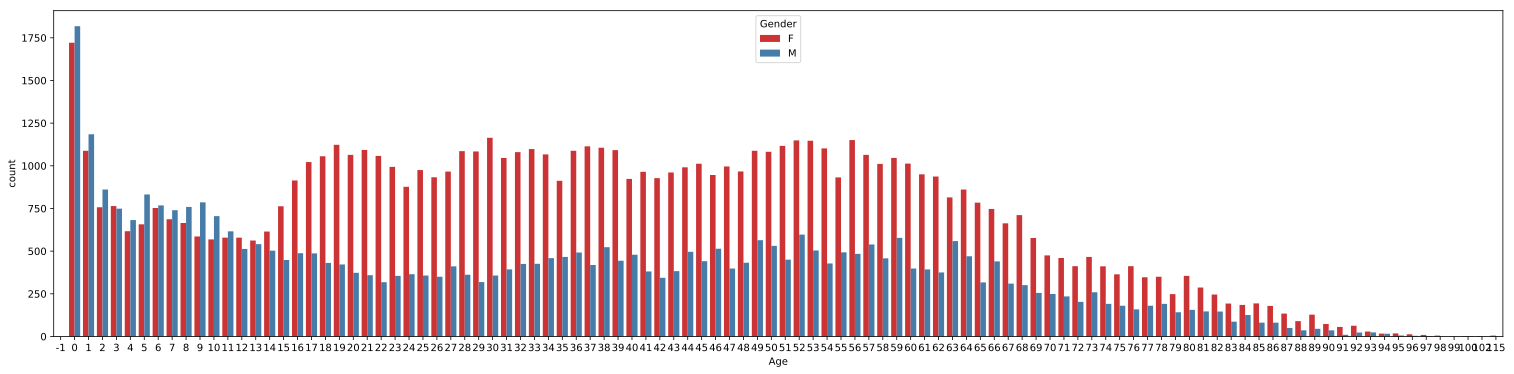

In [25]:
rcParams['figure.figsize'] = 26, 6
sns.countplot(x='Age', hue='Gender', data=df_ages_gender, palette="Set1")

and now make a histogram with part of missed appointmens from common num for each age with a breakdown by gender:

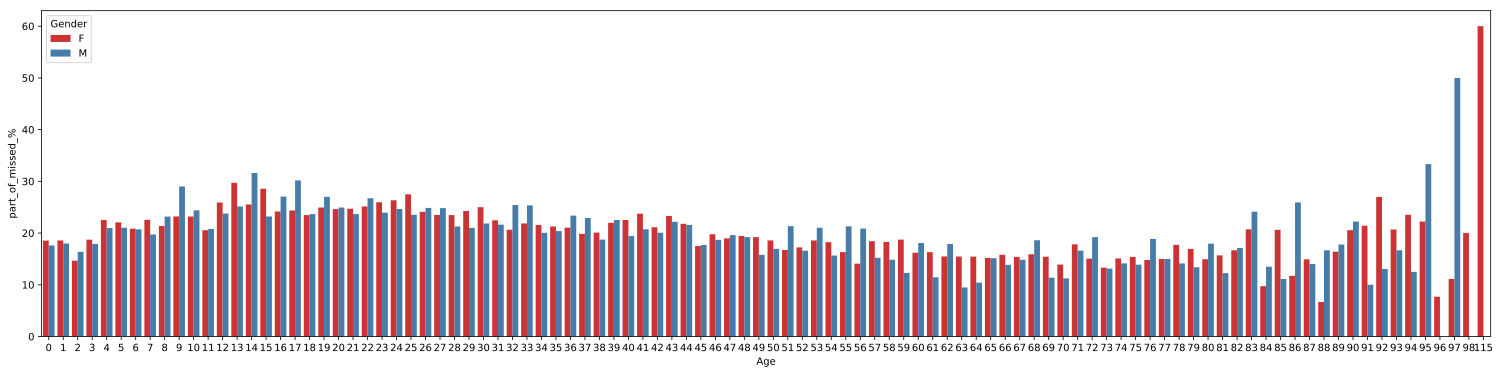

In [26]:
rcParams['figure.figsize'] = 26, 6
sns.barplot(x='Age', y='part_of_missed_%', hue='Gender', data=plot_data_7, palette="Set1")

as can we see there are not special influence of gender on turnout

#### Task 8
Investigate the effect of waiting time on attendance. You can use the same approach as in task 5.

calculating waiting time (days):

In [27]:
df_waiting = df[['AppointmentID','ScheduledDay','AppointmentDay','is_absence']]
df_waiting['waiting_days'] = df_waiting.AppointmentDay - df_waiting.ScheduledDay
df_waiting['waiting_days'] = df_waiting.waiting_days.map(lambda x: int(x.days) + 1)
df_waiting.head()

C:\Users\ushakov_nv\Programms\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ushakov_nv\Programms\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AppointmentID,ScheduledDay,AppointmentDay,is_absence,waiting_days
0,5642903,2016-04-29 18:38:08,2016-04-29,No,0
1,5642503,2016-04-29 16:08:27,2016-04-29,No,0
2,5642549,2016-04-29 16:19:04,2016-04-29,No,0
3,5642828,2016-04-29 17:29:31,2016-04-29,No,0
4,5642494,2016-04-29 16:07:23,2016-04-29,No,0


In [28]:
df_waiting.waiting_days.unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123], dtype=int64)

there are values of 'waiting_days' '-1' and '-6' , this is obviously some mistake!

In [29]:
df_waiting[df_waiting.waiting_days.isin([-1,-6])]

,AppointmentID,ScheduledDay,AppointmentDay,is_absence,waiting_days
27033,5679978,2016-05-10 10:51:53,2016-05-09,Yes,-1
55226,5715660,2016-05-18 14:50:41,2016-05-17,Yes,-1
64175,5664962,2016-05-05 13:43:58,2016-05-04,Yes,-1
71533,5686628,2016-05-11 13:49:20,2016-05-05,Yes,-6
72362,5655637,2016-05-04 06:50:57,2016-05-03,Yes,-1


moreover, there are few such lines, we are going to drop it:

In [30]:
df_waiting = df_waiting[~(df_waiting.waiting_days.isin([-1,-6]))]

for each of waiting days let's calculate common count of attended and missed appointments:

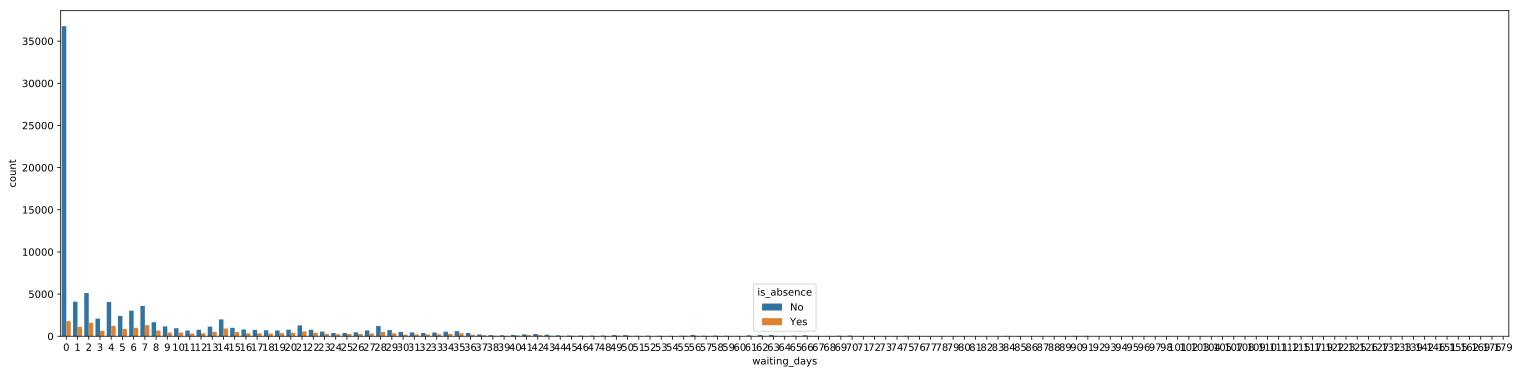

In [31]:
rcParams['figure.figsize'] = 26, 6
sns.countplot(x='waiting_days', hue='is_absence', data=df_waiting)

such scale is difficult to read, so let's group 'waiting_days' to 3 groups: '0 days', '1-7 days' and 'more than 7 days':

In [32]:
df_waiting['waiting_group'] = df_waiting.waiting_days.map(lambda x: '0 days' if x==0 else ('1-7 days' if x<=7 else 'more than 7 days'))
df_waiting.head()

,AppointmentID,ScheduledDay,AppointmentDay,is_absence,waiting_days,waiting_group
0,5642903,2016-04-29 18:38:08,2016-04-29,No,0,0 days
1,5642503,2016-04-29 16:08:27,2016-04-29,No,0,0 days
2,5642549,2016-04-29 16:19:04,2016-04-29,No,0,0 days
3,5642828,2016-04-29 17:29:31,2016-04-29,No,0,0 days
4,5642494,2016-04-29 16:07:23,2016-04-29,No,0,0 days


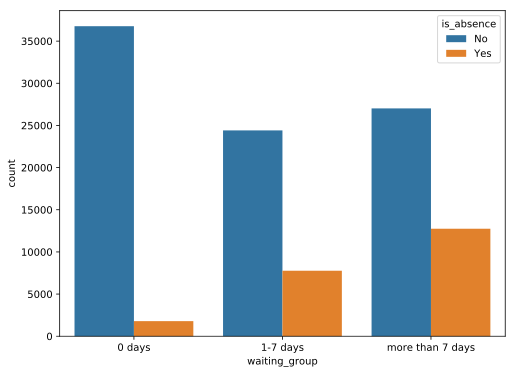

In [33]:
rcParams['figure.figsize'] = 8, 6
sns.countplot(x='waiting_group', hue='is_absence', data=df_waiting)

obviously, as the waiting time increases, the number of absence also increases! 

#### Task 9
In general, for the sample, does SMS affect turnout?

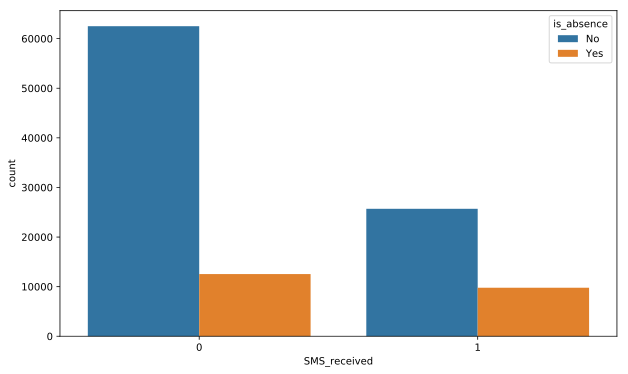

In [34]:
rcParams['figure.figsize'] = 10, 6
sns.countplot(x='SMS_received', hue='is_absence', data=df)

in absolute value of absence there is almost no difference, however the part of absence is much more in the case when the message has been sent! 

#### Task 10
Investigate the impact of texting on truant turnout. A truant is someone who missed an appointment at least once.

Are these conclusions correct for those patients who had more than 1 entry (> = 5 entries)?

identify patients-truants:

In [35]:
df_absence = df[df.is_absence == 'Yes'][['PatientId']].drop_duplicates()
df_sms = pd.merge(df, df_absence, how='right', on='PatientId')

and look the distribution:

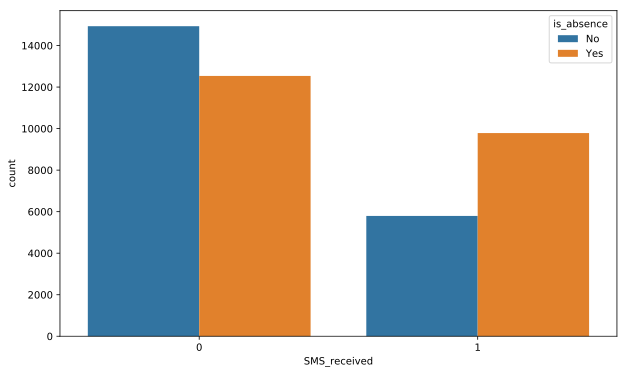

In [36]:
rcParams['figure.figsize'] = 10, 6
sns.countplot(x='SMS_received', hue='is_absence', data=df_sms)

it seems that messages have negative influences on patients-truants!

for patients-truants who had more than 1 entry:

In [37]:
df_sms_1 = pd.merge(df_sms, df_patients_groups[(df_patients_groups.app_count > 1)][['PatientId']].drop_duplicates(), 
                    how='right', on='PatientId')

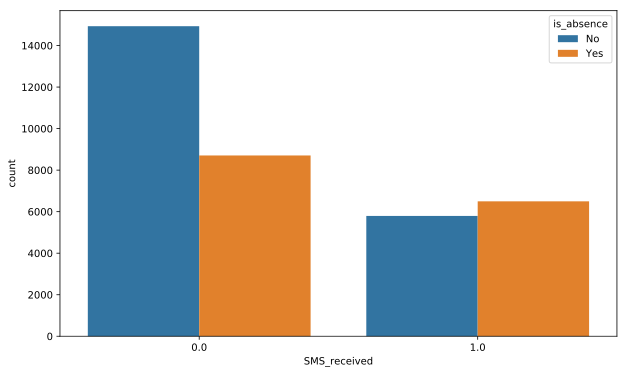

In [38]:
rcParams['figure.figsize'] = 10, 6
sns.countplot(x='SMS_received', hue='is_absence', data=df_sms_1)

almost the same situation!

for patients-truants who had from 5 entry:

In [39]:
df_sms_5 = pd.merge(df_sms, df_patients_groups[(df_patients_groups.app_count >= 5)][['PatientId']].drop_duplicates(),
                    how='right', on='PatientId').sort_values(by='is_absence')

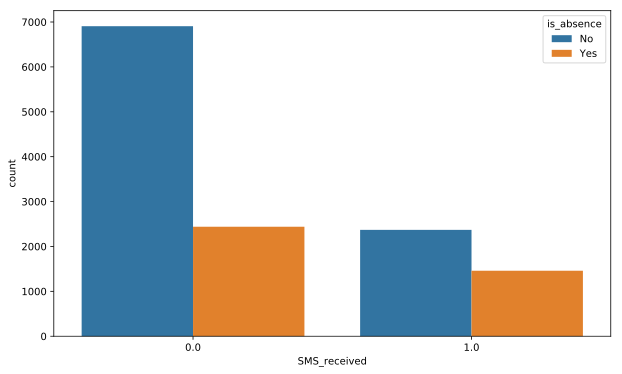

In [40]:
rcParams['figure.figsize'] = 10, 6
sns.countplot(x='SMS_received', hue='is_absence', data=df_sms_5)

and here a little better but part of absence is still increase!

based on the results of the analysis, we can conclude about the negative impact of SMS on turnout, but it seems strange

### Task 11
Conduct a cohort analysis for customers of the online store, displaying retention (the percentage of customers in the cohort in the period 1-2-3, etc.).


Data for work can be downloaded via the [link](https://drive.google.com/file/d/1K5LLBiCZ6p_34ANiMo0rI46xMdP5ZfRT/view?usp=sharing). This is data on the sales of goods from one online store, the data contains the number of the receipt, the number of the item in the warehouse, its description, the number of items in the check line, date, price per unit, customer ID, as well as the country in which the sale took place.

by retention we will understand the part of customers of the previous period who made at least one purchase in the current period

In [41]:
data = pd.read_csv('online retail.csv', encoding='latin1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


it would be logical to take a month as the period

for convenience, we will create a column 'Period_ID' and encode the time period in it in the format 'YYYYMM':

In [42]:
data['Period_ID'] = pd.to_datetime(data.InvoiceDate).map(lambda x: 100*x.year + x.month)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Period_ID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,201012
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,201012


In [43]:
data.Period_ID.unique()

array([201012, 201101, 201102, 201103, 201104, 201105, 201106, 201107,
       201108, 201109, 201110, 201111, 201112], dtype=int64)

for each period starting from the second we calculate retention:

In [44]:
periodsList = data.Period_ID.unique()
retentionList = []

prev_period = periodsList[0]
for _period in periodsList[1:]:
    _prevCustomers = data[data.Period_ID == prev_period].CustomerID.unique()
    _currCustomers = data[(data.Period_ID == _period) & 
                          (data.CustomerID.isin(_prevCustomers))].CustomerID.unique()
    retentionList.append( round( (len(_currCustomers) / len(_prevCustomers) )*100, 1) )
    prev_period = _period
    
df_retension = pd.DataFrame(data={'Period_ID': data.Period_ID.unique()[1:], 'retention(%)': retentionList})

results on DataFrame:

In [45]:
df_retension

,Period_ID,retention(%)
0,201101,38.3
1,201102,38.3
2,201103,43.3
3,201104,34.0
4,201105,44.4
5,201106,43.1
6,201107,39.5
7,201108,43.7
8,201109,47.5
9,201110,42.4


results on the histogram:

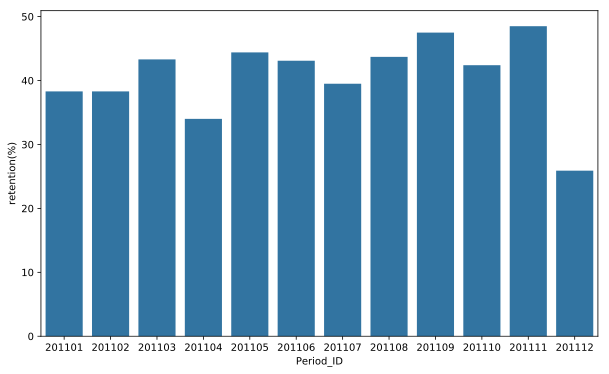

In [46]:
rcParams['figure.figsize'] = 10, 6
sns.barplot(data=df_retension, x = 'Period_ID', y = 'retention(%)', color="tab:blue")

In [47]:
df_retension.describe()

,Period_ID,retention(%)
count,12.000000,12.000000
mean,201106.500000,40.741667
std,3.605551,6.194199
min,201101.000000,25.900000
25%,201103.750000,38.300000
50%,201106.500000,42.750000
75%,201109.250000,43.875000
max,201112.000000,48.500000


we can see that during the year retention is approximately at the same level, at mean 40%